# Analyzing Tabular Data using Python and Pandas

![](https://i.imgur.com/zfxLzEv.png)

This notebook covers the following topics:

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, soring, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files

### How to run the code

This notebook is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, e.g., numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. Don't be afraid to mess around with the code & break things - you'll learn a lot by encountering and fixing errors. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top.

## Reading a CSV file using Pandas

[Pandas](https://pandas.pydata.org/) is a popular Python library used for working in tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL, and more. Let's download a file `italy-covid-daywise.txt` which contains day-wise Covid-19 data for Italy in the following format:

```
date,new_cases,new_deaths,new_tests
2020-04-21,2256.0,454.0,28095.0
2020-04-22,2729.0,534.0,44248.0
2020-04-23,3370.0,437.0,37083.0
2020-04-24,2646.0,464.0,95273.0
2020-04-25,3021.0,420.0,38676.0
2020-04-26,2357.0,415.0,24113.0
2020-04-27,2324.0,260.0,26678.0
2020-04-28,1739.0,333.0,37554.0
...
```

This format of storing data is known as *comma-separated values* or CSV. 

> **CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)


We'll download this file using the `urlretrieve` function from the `urllib.request` module.

In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'data/italy-covid-daywise.csv')

('data/italy-covid-daywise.csv', <http.client.HTTPMessage at 0x2693d8488b0>)

To read the file, we can use the `read_csv` method from Pandas. First, let's install the Pandas library.

In [3]:
!pip install pandas --upgrade --quiet

We can now import the `pandas` module. As a convention, it is imported with the alias `pd`.

In [4]:
import pandas as pd

In [5]:
covid_df = pd.read_csv('data/italy-covid-daywise.csv')

Data from the file is read and stored in a `DataFrame` object - one of the core data structures in Pandas for storing and working with tabular data. We typically use the `_df` suffix in the variable names for dataframes.

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Here's what we can tell by looking at the dataframe:

- The file provides four day-wise counts for COVID-19 in Italy
- The metrics reported are new cases, deaths, and tests
- Data is provided for 248 days: from Dec 12, 2019, to Sep 3, 2020

Keep in mind that these are officially reported numbers. The actual number of cases & deaths may be higher, as not all cases are diagnosed. 

We can view some basic information about the data frame using the `.info` method.

In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the `.describe` method.

In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The `columns` property contains the list of columns within the data frame.

In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

You can also retrieve the number of rows and columns in the data frame using the `.shape` method.

In [11]:
covid_df.shape

(248, 4)

Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple


## Retrieving data from a data frame

The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns. 

In [12]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Representing data in the above format has a few benefits:

* All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.
* The representation is more compact (column names are recorded only once) compared to other formats that use a dictionary for each row of data (see the example below).

In [13]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

With the dictionary of lists analogy in mind, you can now guess how to retrieve data from a data frame. For example, we can get a list of values from a specific column using the `[]` indexing notation.

In [14]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [15]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties.

In [16]:
type(covid_df['new_cases'])

pandas.core.series.Series

Like arrays, you can retrieve a specific value with a series using the indexing notation `[]`.

In [17]:
covid_df['new_cases'][246]

975.0

In [18]:
covid_df['new_tests'][240]

57640.0

Pandas also provides the `.at` method to retrieve the element at a specific row & column directly.

In [19]:
covid_df.at[246, 'new_cases']

975.0

In [20]:
covid_df.at[240, 'new_tests']

57640.0

Instead of using the indexing notation `[]`, Pandas also allows accessing columns as properties of the dataframe using the `.` notation. However, this method only works for columns whose names do not contain spaces or special characters.

In [21]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Further, you can also pass a list of columns within the indexing notation `[]` to access a subset of the data frame with just the given columns.

In [22]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


The new data frame `cases_df` is simply a "view" of the original data frame `covid_df`. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

Sometimes you might need a full copy of the data frame, in which case you can use the `copy` method.

In [23]:
covid_df_copy = covid_df.copy()

The data within `covid_df_copy` is completely separate from `covid_df`, and changing values inside one of them will not affect the other.

To access a specific row of data, Pandas provides the `.loc` method.

In [24]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [25]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

Each retrieved row is also a `Series` object.

In [26]:
type(covid_df.loc[243])

pandas.core.series.Series

We can use the `.head` and `.tail` methods to view the first or last few rows of data.

In [27]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [28]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Notice above that while the first few values in the `new_cases` and `new_deaths` columns are `0`, the corresponding values within the `new_tests` column are `NaN`. That is because the CSV file does not contain any data for the `new_tests` column for specific dates (you can verify this by looking into the file). These values may be missing or unknown.

In [29]:
covid_df.at[0, 'new_tests']

nan

In [30]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

The distinction between `0` and `NaN` is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates. Italy started reporting daily tests on Apr 19, 2020. 93,5310 tests had already been conducted before Apr 19. 

We can find the first index that doesn't contain a `NaN` value using a column's `first_valid_index` method.

In [31]:
covid_df.new_tests.first_valid_index()

111

Let's look at a few rows before and after this index to verify that the values change from `NaN` to actual numbers. We can do this by passing a range to `loc`.

In [32]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


We can use the `.sample` method to retrieve a random sample of rows from the data frame.

In [33]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
218,2020-08-05,190.0,5.0,29739.0
35,2020-02-04,0.0,0.0,NaN
85,2020-03-25,5249.0,743.0,NaN
126,2020-05-05,1221.0,195.0,32211.0
219,2020-08-06,384.0,10.0,32169.0
20,2020-01-20,0.0,0.0,NaN
50,2020-02-19,0.0,0.0,NaN
144,2020-05-23,652.0,130.0,42579.0
27,2020-01-27,0.0,0.0,NaN
95,2020-04-04,4585.0,764.0,NaN


Notice that even though we have taken a random sample, each row's original index is preserved - this is a useful property of data frames.



Here's a summary of the functions & methods we looked at in this section:

- `covid_df['new_cases']` - Retrieving columns as a `Series` using the column name
- `new_cases[243]` - Retrieving values from a `Series` using an index
- `covid_df.at[243, 'new_cases']` - Retrieving a single value from a data frame
- `covid_df.copy()` - Creating a deep copy of a data frame
- `covid_df.loc[243]` - Retrieving a row or range of rows of data from the data frame
- `head`, `tail`, and `sample` - Retrieving multiple rows of data from the data frame
- `covid_df.new_tests.first_valid_index` - Finding the first non-empty index in a series



## Analyzing data from data frames

Let's try to answer some questions about our data.

**Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the `sum` method to answer these questions.

In [34]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [35]:
print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

The number of reported cases is 271515 and the number of reported deaths is 35497.


**Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [36]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [37]:
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**


In [38]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [39]:
total_tests

5214766.0

**Q: What fraction of tests returned a positive result?**

In [40]:
positive_rate = total_cases / total_tests

In [41]:
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [42]:
high_new_cases = covid_df.new_cases > 1000

In [43]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

The boolean expression returns a series containing `True` and `False` boolean values. You can use this series to select a subset of rows from the original dataframe, corresponding to the `True` values in the series.

In [44]:
type(high_new_cases)

pandas.core.series.Series

In [45]:
type(covid_df)

pandas.core.frame.DataFrame

In [46]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can write this succinctly on a single line by passing the boolean expression as an index to the data frame.

In [47]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [48]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


The data frame contains 72 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.

In [49]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall `positive_rate`.

In [50]:
positive_rate

0.05206657403227681

In [51]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [52]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


The result of performing an operation on two columns is a new series.

In [53]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

We can use this series to add a new column to the data frame.

In [54]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [55]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this `positive_rate` column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the `positive_rate` column using the `drop` method.

In [56]:
covid_df.drop(columns=['positive_rate'], inplace=True)

Can you figure the purpose of the `inplace` argument?

### Sorting rows using column values

The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of cases, then chain it with the `head` method to list just the first ten results.

In [57]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [58]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


It appears that daily deaths hit a peak just about a week after the peak in daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year on this list.

In [59]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


It seems like the count of new cases on Jun 20, 2020, was `-148`, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at some days before and after Jun 20, 2020.

In [60]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Replace it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach.

You can use the `.at` method to modify a specific value within the dataframe.

In [61]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases']) / 2

In [62]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


Here's a summary of the functions & methods we looked at in this section:

- `covid_df.new_cases.sum()` - Computing the sum of values in a column or series
- `covid_df[covid_df.new_cases > 1000]` - Querying a subset of rows satisfying the chosen criteria using boolean expressions
- `df['pos_rate'] = df.new_cases/df.new_tests` - Adding new columns by combining data from existing columns
- `covid_df.drop('positive_rate')` - Removing one or more columns from the data frame
- `sort_values` - Sorting the rows of a data frame using column values
- `covid_df.at[172, 'new_cases'] = ...` - Replacing a value within the data frame

## Working with dates

While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.

In [63]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [64]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [65]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [66]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


In [67]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [68]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


You can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class ([view docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)).

In [69]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [70]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the `sum` method to aggregate each selected column's values.

In [71]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [72]:
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]
covid_df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [73]:
covid_totals = covid_df_may_metrics.sum()
covid_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [74]:
type(covid_totals)

pandas.core.series.Series

In [75]:
# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()

In [76]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [77]:
type(covid_may_totals)

pandas.core.series.Series

We can also combine the above operations into a single statement.

In [78]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the `.mean` method.

In [79]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [80]:
# Average for Sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

It seems like more cases were reported on Sundays compared to other days.

Now generate the reports acording to weekdays for each 3 numeric columns.

In [81]:
weekday_report = covid_df[['new_cases', 'new_deaths', 'new_tests']].groupby(covid_df['weekday']).mean()
weekday_report

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1198.528571,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


## Grouping and aggregation

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method. 

In [82]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [83]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


The result is a new data frame that uses unique values from the column passed to `groupby` as the index. Grouping and aggregation is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [84]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [85]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [86]:
covid_df['week_number'] = covid_df['date'].dt.isocalendar().week
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,week_number
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,1
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,1
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,1
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,1
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,35
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,36
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,36
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,36


In [87]:
weekly_report = covid_df.groupby('week_number')[['new_cases', 'new_deaths', 'new_tests']].sum()
weekly_report

,new_cases,new_deaths,new_tests
week_number,,,
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,3.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,76.0,2.0,0.0
9,1049.0,27.0,0.0


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.

In [88]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [89]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [90]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

We've also included the initial test count in `total_test` to account for tests conducted before daily reporting was started. 

In [91]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,week_number,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,1,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,1,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,1,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,1,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,35,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,36,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,36,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,36,270634.5,35491.0,NaN


Notice how the `NaN` values in the `total_tests` column remain unaffected.

## Merging data from multiple sources

To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Let's download another file `locations.csv` that contains health-related information for many countries, including Italy.

In [92]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'data/locations.csv')

('data/locations.csv', <http.client.HTTPMessage at 0x2693c77bee0>)

In [93]:
locations_df = pd.read_csv('data/locations.csv')

In [94]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [95]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

In [96]:
covid_df['location'] = "Italy"

In [97]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,week_number,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,1,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,1,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,1,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,1,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,35,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,36,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,36,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,36,270634.5,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [98]:
merged_df = covid_df.merge(locations_df, on="location")

In [99]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,week_number,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,35,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,36,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,36,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,36,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [100]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [101]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [102]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [103]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,week_number,total_cases,...,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,35,267298.5,...,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,36,268663.5,...,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,36,269659.5,...,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,36,270634.5,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

In [104]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [105]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


To write the data from the data frame into a file, we can use the `to_csv` function. 

In [106]:
# also use "result_df.to_csv('results/results.csv', index=False)"
result_df.to_csv('results/results.csv', index=None)

The `to_csv` function also includes an additional column for storing the index of the dataframe by default. We pass `index=None` to turn off this behavior. You can now verify that the `results.csv` is created and contains data from the data frame in CSV format:

```
date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
2020-02-27,78.0,400.0,1.0,12.0,,,6.61574439992122,0.1984723319976366,
2020-02-28,250.0,650.0,5.0,17.0,,,10.750584649871982,0.28116913699665186,
2020-02-29,238.0,888.0,4.0,21.0,,,14.686952567825108,0.34732658099586405,
2020-03-01,240.0,1128.0,8.0,29.0,,,18.656399207777838,0.47964146899428844,
2020-03-02,561.0,1689.0,6.0,35.0,,,27.93498072866735,0.5788776349931067,
2020-03-03,347.0,2036.0,17.0,52.0,,,33.67413899559901,0.8600467719897585,
...
```

You can find the CSV file in the "Files" tab on the project page.

## Bonus: Basic Plotting with Pandas

We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

Let's plot a line graph showing how the number of daily cases varies over time.

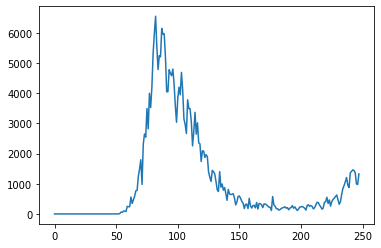

In [107]:
result_df.new_cases.plot();

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

In [108]:
result_df.set_index('date', inplace=True)

In [109]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific data using `.loc`.

In [110]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.696595e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.459996e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

Let's plot the new cases & new deaths per day as line graphs.

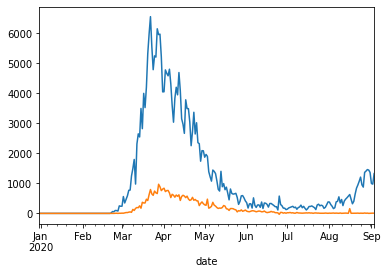

In [111]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

We can also compare the total cases vs. total deaths.

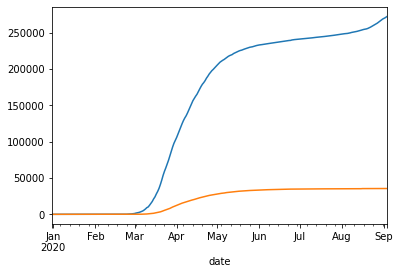

In [112]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Let's see how the death rate and positive testing rates vary over time.

In [113]:
death_rate = result_df.total_deaths / result_df.total_cases

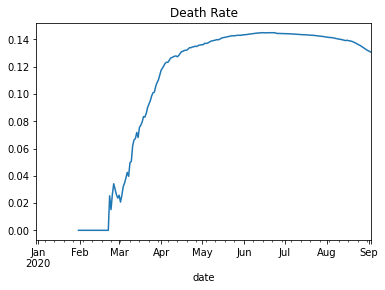

In [114]:
death_rate.plot(title='Death Rate');

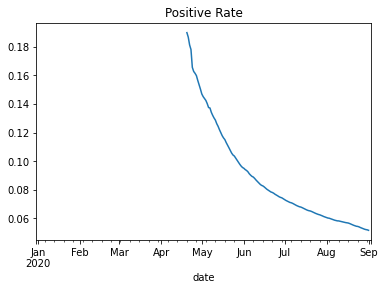

In [115]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

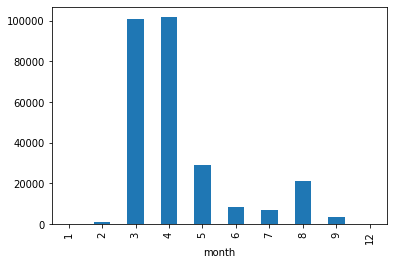

In [116]:
covid_month_df.new_cases.plot(kind='bar');

<AxesSubplot:xlabel='month'>

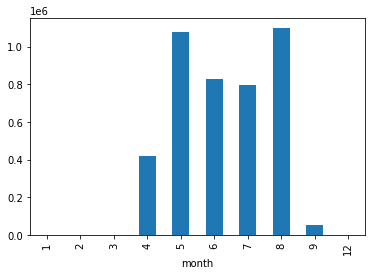

In [117]:
covid_month_df.new_tests.plot(kind='bar')

## Exercises

Try datasets from Kaggle to become familiar with Pandas dataframe and practice your skills:

* Try downloading and analyzing some data from Kaggle: https://www.kaggle.com/datasets

## Summary and Further Reading


We've covered the following topics in this notebook:

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, soring, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files


Check out the following resources to learn more about Pandas:

* User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Python for Data Analysis (book by Wes McKinney - creator of Pandas): https://www.oreilly.com/library/view/python-for-data/9781491957653/

## Questions for Revision

Try answering the following questions to test your understanding of the topics covered in this notebook:

1. What is Pandas? What makes it useful?
2. How do you install the Pandas library?
3. How do you import the `pandas` module?
4. What is the common alias used while importing the `pandas` module?
5. How do you read a CSV file using Pandas? Give an example?
6. What are some other file formats you can read using Pandas? Illustrate with examples.
7. What are Pandas dataframes? 
8. How are Pandas dataframes different from Numpy arrays?
9. How do you find the number of rows and columns in a dataframe?
10. How do you get the list of columns in a dataframe?
11. What is the purpose of the `describe` method of a dataframe?
12. How are the `info` and `describe` dataframe methods different?
13. Is a Pandas dataframe conceptually similar to a list of dictionaries or a dictionary of lists? Explain with an example.
14. What is a Pandas `Series`? How is it different from a Numpy array?
15. How do you access a column from a dataframe?
16. How do you access a row from a dataframe?
17. How do you access an element at a specific row & column of a dataframe?
18. How do you create a subset of a dataframe with a specific set of columns?
19. How do you create a subset of a dataframe with a specific range of rows?
20. Does changing a value within a dataframe affect other dataframes created using a subset of the rows or columns? Why is it so?
21. How do you create a copy of a dataframe?
22. Why should you avoid creating too many copies of a dataframe?
23. How do you view the first few rows of a dataframe?
24. How do you view the last few rows of a dataframe?
25. How do you view a random selection of rows of a dataframe?
26. What is the "index" in a dataframe? How is it useful?
27. What does a `NaN` value in a Pandas dataframe represent?
28. How is `Nan` different from `0`?
29. How do you identify the first non-empty row in a Pandas series or column?
30. What is the difference between `df.loc` and `df.at`?
31. Where can you find a full list of methods supported by Pandas `DataFrame` and `Series` objects?
32. How do you find the sum of numbers in a column of dataframe?
33. How do you find the mean of numbers in a column of a dataframe?
34. How do you find the number of non-empty numbers in a column of a dataframe?
35. What is the result obtained by using a Pandas column in a boolean expression? Illustrate with an example.
36. How do you select a subset of rows where a specific column's value meets a given condition? Illustrate with an example.
37. What is the result of the expression `df[df.new_cases > 100]` ?
38. How do you display all the rows of a pandas dataframe in a Jupyter cell output?
39. What is the result obtained when you perform an arithmetic operation between two columns of a dataframe? Illustrate with an example.
40. How do you add a new column to a dataframe by combining values from two existing columns? Illustrate with an example.
41. How do you remove a column from a dataframe? Illustrate with an example.
42. What is the purpose of the `inplace` argument in dataframe methods?
43. How do you sort the rows of a dataframe based on the values in a particular column?
44. How do you sort a pandas dataframe using values from multiple columns?
45. How do you specify whether to sort by ascending or descending order while sorting a Pandas dataframe?
46. How do you change a specific value within a dataframe?
47. How do you convert a dataframe column to the `datetime` data type?
48. What are the benefits of using the `datetime` data type instead of `object`?
49. How do you extract different parts of a date column like the month, year, month, weekday, etc., into separate columns? Illustrate with an example.
50. How do you aggregate multiple columns of a dataframe together?
51. What is the purpose of the `groupby` method of a dataframe? Illustrate with an example.
52. What are the different ways in which you can aggregate the groups created by `groupby`?
53. What do you mean by a running or cumulative sum? 
54. How do you create a new column containing the running or cumulative sum of another column?
55. What are other cumulative measures supported by Pandas dataframes?
56. What does it mean to merge two dataframes? Give an example.
57. How do you specify the columns that should be used for merging two dataframes?
58. How do you write data from a Pandas dataframe into a CSV file? Give an example.
59. What are some other file formats you can write to from a Pandas dataframe? Illustrate with examples.
60. How do you create a line plot showing the values within a column of dataframe?
61. How do you convert a column of a dataframe into its index?
62. Can the index of a dataframe be non-numeric?
63. What are the benefits of using a non-numeric dataframe? Illustrate with an example.
64. How you create a bar plot showing the values within a column of a dataframe?
65. What are some other types of plots supported by Pandas dataframes and series?
